<a href="https://colab.research.google.com/github/dannydoan43/digitalrecognition/blob/main/digitrec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt



# split data into train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


8


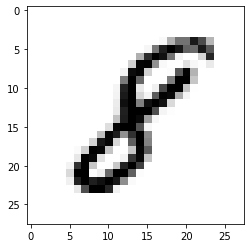

In [ ]:
image_index = 7777 # 1-60,000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [ ]:

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes=None)

y_test = np_utils.to_categorical(y_test, num_classes=None)

In [ ]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Grey scale 0 - 255
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
my_model = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Model saved as mnist.h5")

Epoch 1/10
469/469 [==============================] - 135s 285ms/step - loss: 2.2933 - accuracy: 0.1354 - val_loss: 2.2093 - val_accuracy: 0.3559
Epoch 2/10
469/469 [==============================] - 136s 291ms/step - loss: 2.1987 - accuracy: 0.2833 - val_loss: 2.0883 - val_accuracy: 0.5489
Epoch 3/10
469/469 [==============================] - 134s 287ms/step - loss: 2.0807 - accuracy: 0.4244 - val_loss: 1.9192 - val_accuracy: 0.6650
Epoch 4/10
469/469 [==============================] - 135s 288ms/step - loss: 1.9144 - accuracy: 0.5370 - val_loss: 1.6929 - val_accuracy: 0.7303
Epoch 5/10
469/469 [==============================] - 135s 287ms/step - loss: 1.7043 - accuracy: 0.6013 - val_loss: 1.4332 - val_accuracy: 0.7624
Epoch 6/10
469/469 [==============================] - 135s 288ms/step - loss: 1.4713 - accuracy: 0.6439 - val_loss: 1.1852 - val_accuracy: 0.7874
Epoch 7/10
469/469 [==============================] - 136s 289ms/step - loss: 1.2714 - accuracy: 0.6713 - val_loss: 0.9858 -

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 1)

print("Test Loss" , score[0])
print("Test Accuracy" , score[1])

313/313 [==============================] - 7s 21ms/step - loss: 0.6601 - accuracy: 0.8460
Test Loss 0.660072922706604
Test Accuracy 0.8460000157356262



Predicted Number : 9




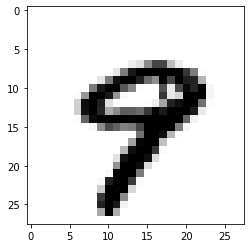

In [ ]:
image_index = 9
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
prednumber = "\nPredicted Number"
actual = pred.argmax()
print("{} : {}".format(prednumber,actual))
print("\n")